In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.1.0


In [4]:
dataset = pd.read_csv("improved_personality_traits_datection_dataset.csv")
dataset.drop(dataset.columns[0], axis = 1, inplace = True) 
dataset

,Review,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,"""Well, right now I just woke up from a mid-day...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,"""An open keyboard and buttons to push. The thi...",0,1,0,1,1
3,I can't believe it! It's really happening! M...,1,0,1,1,0
4,"""Well, here I go with the good old stream of c...",1,0,1,0,1
...,...,...,...,...,...,...
2447,I'm home. wanted to go to bed but remembe...,0,1,0,1,0
2448,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1
2449,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0
2450,"""Man this week has been hellish. Anyways, now ...",0,1,0,0,1


In [5]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

training_labels_final = []
testing_labels_final = []

In [6]:
training_sentences = dataset['Review'][0:1500]
testing_sentences = dataset['Review'][1500:]

training_labels_Extroversion = dataset['Extroversion'][0:1500]
testing_labels_Extroversion = dataset['Extroversion'][1500:]

training_labels_Neuroticism = dataset['Neuroticism'][0:1500]
testing_labels_Neuroticism = dataset['Neuroticism'][1500:]

training_labels_Agreeableness = dataset['Agreeableness'][0:1500]
testing_labels_Agreeableness = dataset['Agreeableness'][1500:]

training_labels_Conscientiousness = dataset['Conscientiousness'][0:1500]
testing_labels_Conscientiousness = dataset['Conscientiousness'][1500:]

training_labels_Openness = dataset['Openness'][0:1500]
testing_labels_Openness = dataset['Openness'][1500:]



#training_labels_final = np.array(training_labels)
#testing_labels_final = np.array(testing_labels)

training_labels_Extroversion_final = np.asarray(training_labels_Extroversion).astype(np.float32)
testing_labels_Extroversion_final = np.asarray(testing_labels_Extroversion).astype(np.float32)

training_labels_Neuroticism_final = np.asarray(training_labels_Neuroticism).astype(np.float32)
testing_labels_Neuroticism_final = np.asarray(testing_labels_Neuroticism).astype(np.float32)

training_labels_Agreeableness_final = np.asarray(training_labels_Agreeableness).astype(np.float32)
testing_labels_Agreeableness_final = np.asarray(testing_labels_Agreeableness).astype(np.float32)

training_labels_Conscientiousness_final = np.asarray(training_labels_Conscientiousness).astype(np.float32)
testing_labels_Conscientiousness_final = np.asarray(testing_labels_Conscientiousness).astype(np.float32)

training_labels_Openness_final = np.asarray(training_labels_Openness).astype(np.float32)
testing_labels_Openness_final = np.asarray(testing_labels_Openness).astype(np.float32)



In [7]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

well here we go with the stream of consciousness essay i used to do things like this in high school sometimes they were pretty interesting but i often find myself with a lack of things to say i normally consider myself someone who gets straight to the point i wonder if i should hit enter any time to send this back to the front maybe i'll fix it later my friend is playing guitar in my room now sort of playing anyway more like messing with it he's still learning there's a drawing on the wall next to me comic book characters i think but i'm not sure who they are it's been a while since i've kept up with
Well, here we go with the stream of consciousness essay. I used to do things like this in high school sometimes. They were pretty interesting, but I often find myself with a lack of things to say. I normally consider myself someone who gets straight to the point. I wonder if I should hit enter any time to send this back to the front. Maybe I'll fix it later. My friend is playing guitar in 

In [7]:
model_Extroversion = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Extroversion.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



model_Neuroticism = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Neuroticism.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



model_Agreeableness = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Agreeableness.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



model_Conscientiousness = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Conscientiousness.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



model_Openness = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Openness.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#load models to avoid training time

#model_Extroversion = tf.keras.models.load_model('cnn_model_Extroversion.h5')
#model_Neuroticism = tf.keras.models.load_model('cnn_model_Neuroticism.h5')
#model_Agreeableness = tf.keras.models.load_model('cnn_model_Agreeableness.h5')
#model_Conscientiousness = tf.keras.models.load_model('cnn_model_Conscientiousness.h5')
#model_Openness = tf.keras.models.load_model('cnn_model_Openness.h5')

In [9]:
num_epochs = 30

history_Extroversion = model_Extroversion.fit(padded, training_labels_Extroversion_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_Extroversion_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/30
1500/1500 [==============================] - 5s 4ms/sample - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6922 - val_accuracy: 0.5168
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6868 - accuracy: 0.5253 - val_loss: 0.6924 - val_accuracy: 0.5210
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6507 - accuracy: 0.6340 - val_loss: 0.7087 - val_accuracy: 0.5032
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5092 - accuracy: 0.7807 - val_loss: 0.9205 - val_accuracy: 0.4958
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.3240 - accuracy: 0.8647 - val_loss: 1.1090 - val_accuracy: 0.4979
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.1881 - accuracy: 0.9280 - val_loss: 1.5038 - val_accuracy: 0.4863
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/sample - loss:

In [10]:
num_epochs = 30

history_Neuroticism = model_Neuroticism.fit(padded, training_labels_Neuroticism_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_Neuroticism_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/30
1500/1500 [==============================] - 6s 4ms/sample - loss: 0.6936 - accuracy: 0.5167 - val_loss: 0.6942 - val_accuracy: 0.4737
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6882 - accuracy: 0.5380 - val_loss: 0.6962 - val_accuracy: 0.4664
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6646 - accuracy: 0.6053 - val_loss: 0.7001 - val_accuracy: 0.4905
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5379 - accuracy: 0.7747 - val_loss: 0.7794 - val_accuracy: 0.4811
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.3184 - accuracy: 0.8873 - val_loss: 1.1597 - val_accuracy: 0.5021
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.1482 - accuracy: 0.9580 - val_loss: 1.3340 - val_accuracy: 0.5116
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/sample - loss:

In [11]:
num_epochs = 30

history__Agreeableness = model_Agreeableness.fit(padded, training_labels_Agreeableness_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_Agreeableness_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/30
1500/1500 [==============================] - 6s 4ms/sample - loss: 0.6923 - accuracy: 0.5287 - val_loss: 0.6909 - val_accuracy: 0.5336
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/sample - loss: 0.6855 - accuracy: 0.5287 - val_loss: 0.6909 - val_accuracy: 0.5336
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/sample - loss: 0.6581 - accuracy: 0.5587 - val_loss: 0.7085 - val_accuracy: 0.5305
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5340 - accuracy: 0.7880 - val_loss: 0.7454 - val_accuracy: 0.4989
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.2988 - accuracy: 0.9087 - val_loss: 1.0079 - val_accuracy: 0.5158
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.1538 - accuracy: 0.9573 - val_loss: 1.2684 - val_accuracy: 0.5179
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/sample - loss:

In [12]:
num_epochs = 30

history_Conscientiousness = model_Conscientiousness.fit(padded, training_labels_Conscientiousness_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_Conscientiousness_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/30
1500/1500 [==============================] - 6s 4ms/sample - loss: 0.6932 - accuracy: 0.5093 - val_loss: 0.6936 - val_accuracy: 0.4863
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6917 - accuracy: 0.5207 - val_loss: 0.6938 - val_accuracy: 0.4842
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6815 - accuracy: 0.6167 - val_loss: 0.6899 - val_accuracy: 0.5326
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5779 - accuracy: 0.7433 - val_loss: 0.7428 - val_accuracy: 0.5116
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.3858 - accuracy: 0.8367 - val_loss: 0.8505 - val_accuracy: 0.5200
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.2200 - accuracy: 0.9333 - val_loss: 1.0689 - val_accuracy: 0.5326
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/sample - loss:

In [13]:
num_epochs = 30

history_Openness = model_Openness.fit(padded, training_labels_Extroversion_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_Openness_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/30
1500/1500 [==============================] - 6s 4ms/sample - loss: 0.6936 - accuracy: 0.5113 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6897 - accuracy: 0.5433 - val_loss: 0.6936 - val_accuracy: 0.5147
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6648 - accuracy: 0.6380 - val_loss: 0.7158 - val_accuracy: 0.4916
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5224 - accuracy: 0.7787 - val_loss: 0.8584 - val_accuracy: 0.4779
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.3055 - accuracy: 0.8833 - val_loss: 1.1359 - val_accuracy: 0.4538
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.1616 - accuracy: 0.9513 - val_loss: 1.3479 - val_accuracy: 0.4685
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/sample - loss:

In [14]:
import matplotlib.pyplot as plt

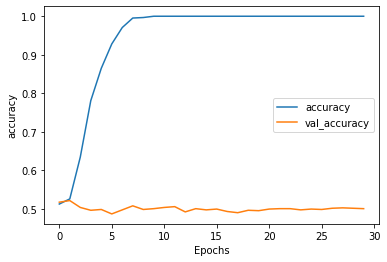

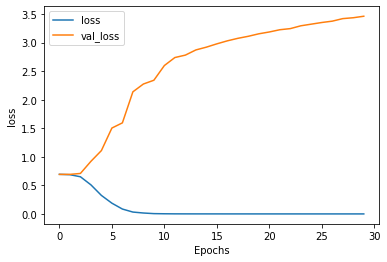

In [15]:
history = history_Extroversion

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

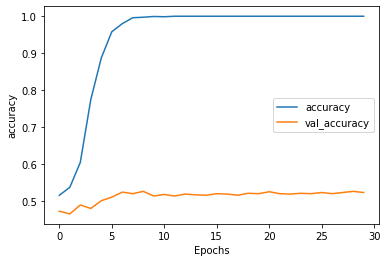

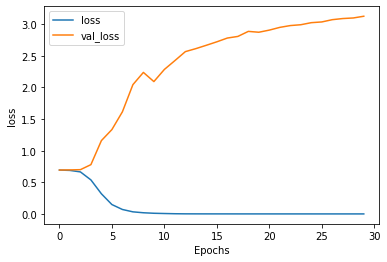

In [16]:
history = history_Neuroticism

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

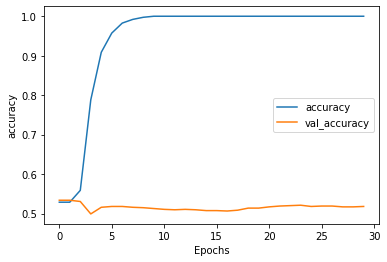

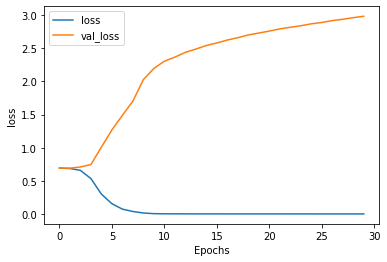

In [17]:
history = history__Agreeableness

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

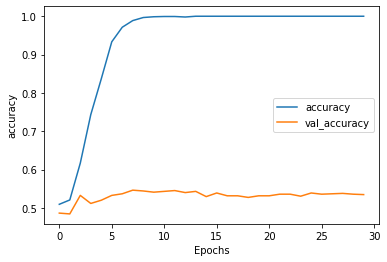

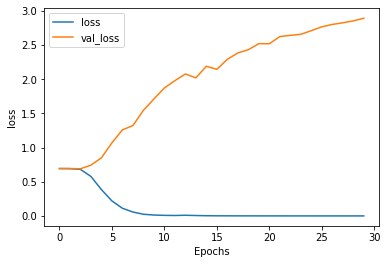

In [18]:
history = history_Conscientiousness

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

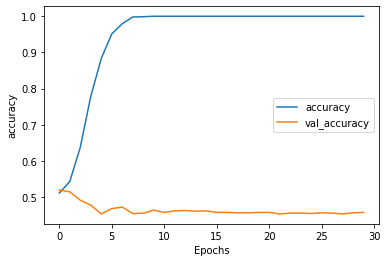

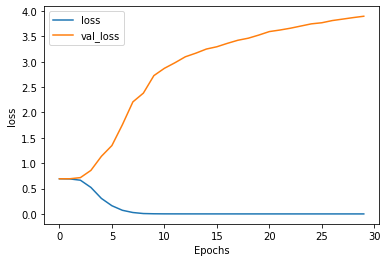

In [19]:
history = history_Openness

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [30]:
#fros keras.models import load_model
model_Extroversion.save('modelscnn_model_Extroversion.h5')
model_Neuroticism.save('models/cnn_model_Neuroticism.h5')
model_Agreeableness.save('models/cnn_model_Agreeableness.h5')
model_Conscientiousness.save('models/cnn_model_Conscientiousness.h5')
model_Openness.save('models/cnn_model_Openness.h5')

In [21]:
#e = model_Extroversion.layers[0]
#weights = e.get_weights()[0]
#print(weights.shape)

In [22]:
#import io

#out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
#out_m = io.open('meta.tsv', 'w', encoding='utf-8')
#for word_num in range(1, vocab_size):
#  word = reverse_word_index[word_num]
#  embeddings = weights[word_num]
#  out_m.write(word + "\n")
#  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
#out_v.close()
#out_m.close()

In [23]:
#predicting on celebrity dataset

In [24]:
#importing celebrities dataset
dataset = pd.read_csv("celeb_scrapped_data.csv")
dataset.drop(dataset.columns[[0,1]], axis = 1, inplace = True) 
dataset

,Name,Biodata
0,shah rukh khan,Shahrukh Khan was born on 2 November 1965 in N...
1,aamir khan,Aamir is no doubt one of the most dedicated ac...
2,salman khan,"Born on December 27, 1965 Salman Khan is the s..."
3,katrina kaif,"Katrina Kaif is one of eight siblings, 7 girls..."
4,kareena kapoor,Kareena was born to Sindhi-speaking Babita (ne...
...,...,...
95,emraan hashmi,Emraan Hashmi was born 24 March 1979) is an In...
96,mallika sherawat,"Mallika Sherawat was born on October 24, 1976 ..."
97,nawazuddin siddiqui,Nawazuddin Siddiqui (born 1974) also known as ...
98,aditya roy kapoor,"Aditya Roy Kapoor was born on November 16, 198..."


In [25]:
#creating padding from celebrity dataset
testing_sentences = dataset['Biodata']
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [26]:
X = testing_padded

yhat_Extroversion = model_Extroversion.predict(X)
yhat_Neuroticism = model_Neuroticism.predict(X)
yhat_Agreeableness = model_Agreeableness.predict(X)
yhat_Conscientiousness = model_Conscientiousness.predict(X)
yhat_Openness = model_Openness.predict(X)

In [27]:
dataset['Extroversion'] = yhat_Extroversion*100
dataset['Neuroticism'] = yhat_Neuroticism*100
dataset['Agreeableness'] = yhat_Agreeableness*100
dataset['Conscientiousness'] = yhat_Conscientiousness*100
dataset['Openness'] = yhat_Openness*100

In [ ]:
#dataset

In [29]:
for i in range (100):
    print("Name                  : "+dataset['Name'][i])
    print('.........................................')
    print("Extroversion (%)      : "+str(dataset['Extroversion'][i]))
    print("Neuroticism (%)       : "+str(dataset['Neuroticism'][i]))
    print("Agreeableness (%)     : "+str(dataset['Agreeableness'][i]))
    print("Conscientiousness (%) : "+str(dataset['Conscientiousness'][i]))
    print("Openness (%)          : "+str(dataset['Openness'][i]))
    print("\n\n")

.2482305e-05



Name                  : dilip kumar
.........................................
Extroversion (%)      : 0.01184884
Neuroticism (%)       : 0.7267644
Agreeableness (%)     : 100.0
Conscientiousness (%) : 0.22286016
Openness (%)          : 0.6393262



Name                  : hema malini
.........................................
Extroversion (%)      : 99.99551
Neuroticism (%)       : 5.759497
Agreeableness (%)     : 100.0
Conscientiousness (%) : 3.3249226
Openness (%)          : 0.013774706



Name                  : madhuri dixit
.........................................
Extroversion (%)      : 24.579847
Neuroticism (%)       : 37.66049
Agreeableness (%)     : 99.99822
Conscientiousness (%) : 1.2644217
Openness (%)          : 0.00027096525



Name                  : govinda
.........................................
Extroversion (%)      : 1.5232869
Neuroticism (%)       : 9.71112
Agreeableness (%)     : 99.996254
Conscientiousness (%) : 0.37853044
Openness (%)          : 